In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

hf = h5py.File('gammaray_lab4.h5', 'r')

In [74]:
hf.keys()

<KeysViewHDF5 ['data']>

In [2]:
data = np.array(hf.get('data'))

In [3]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [4]:
hf.close()

# Problem 1

Plotting solar phase over time, it looks periodic!

Text(0.5, 1.0, 'Solar Phase over time')

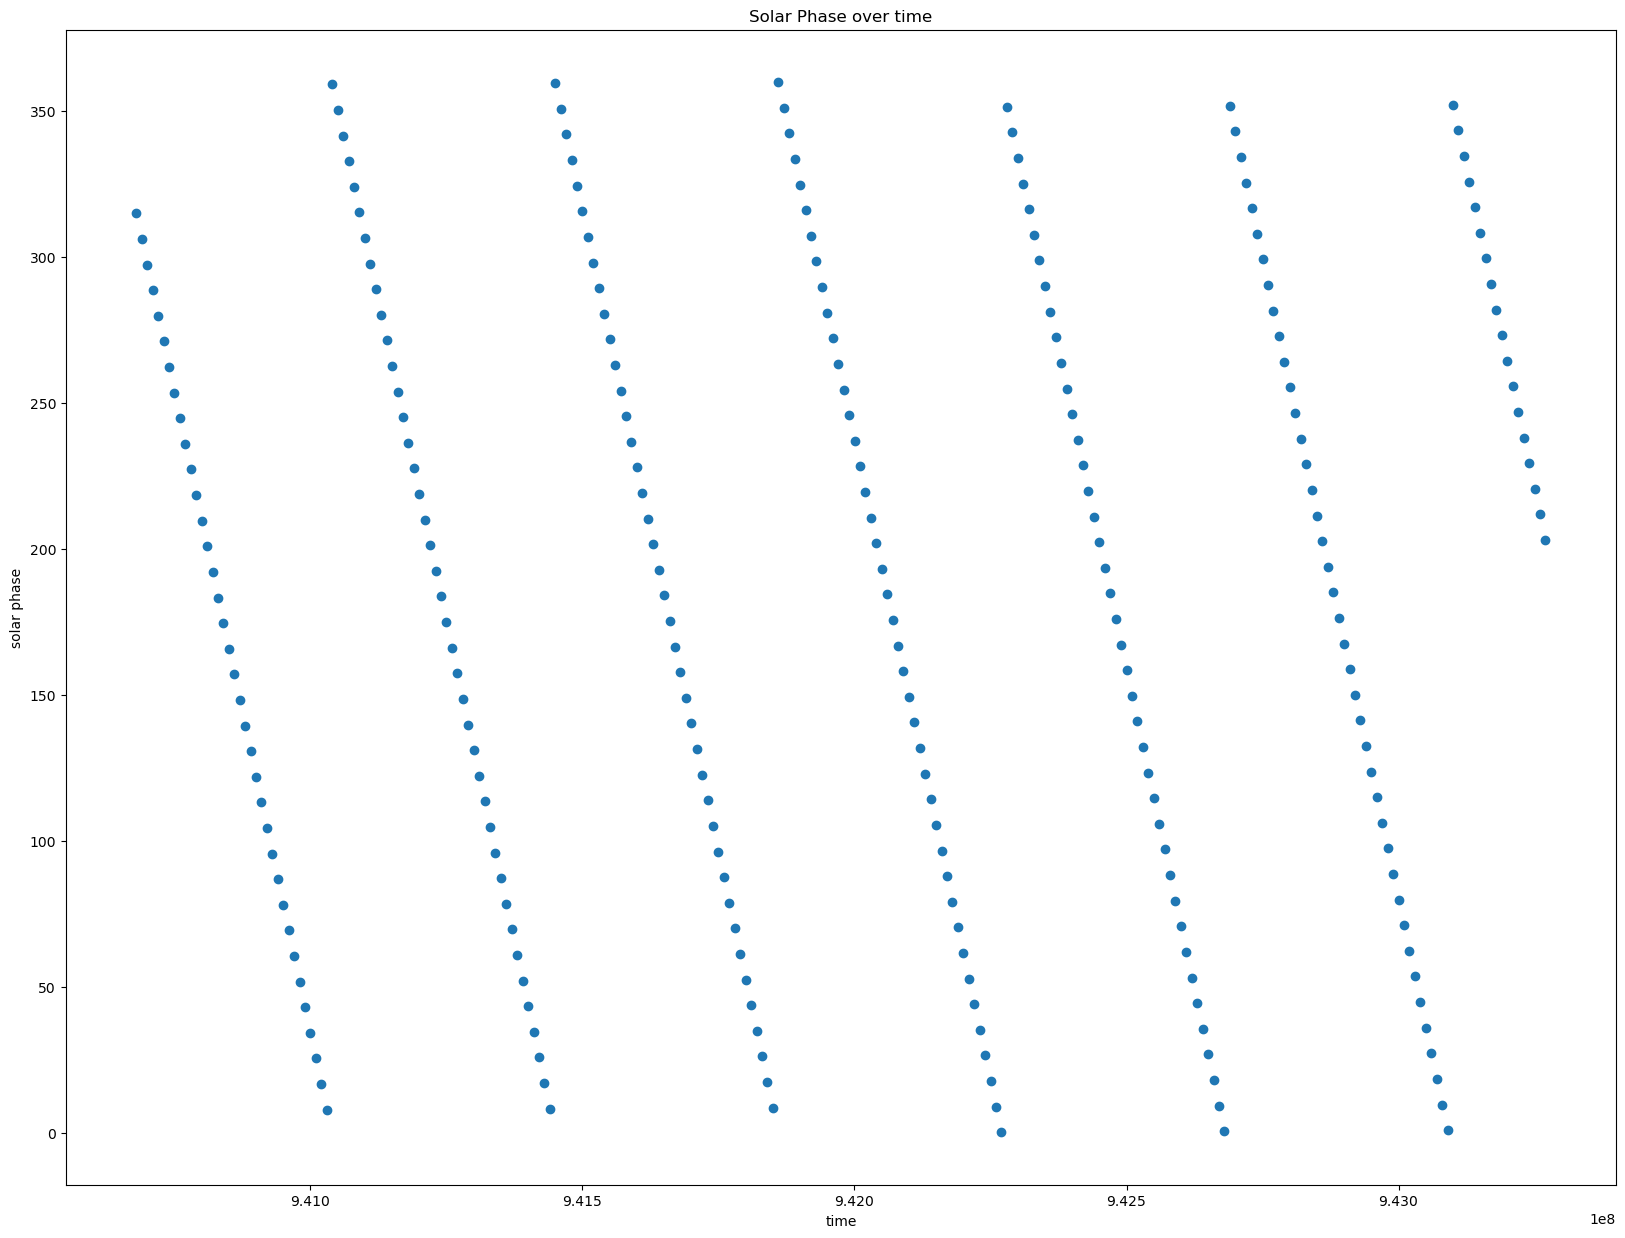

In [5]:
import matplotlib.pyplot as plt
import math

time=np.array(data[0])
solarphase=np.array(data[1])
earthlongitude=np.array(data[2])
particlecount=np.array(data[3])

x=time[::100000] 
y=solarphase[::100000]% (360)
plt.scatter(x, y, marker='o');
plt.xlabel('time')
plt.ylabel('solar phase')
plt.title('Solar Phase over time')

In [9]:
Plotting the earth longitude over time, the 

Text(0.5, 1.0, 'Earth Longitude over time')

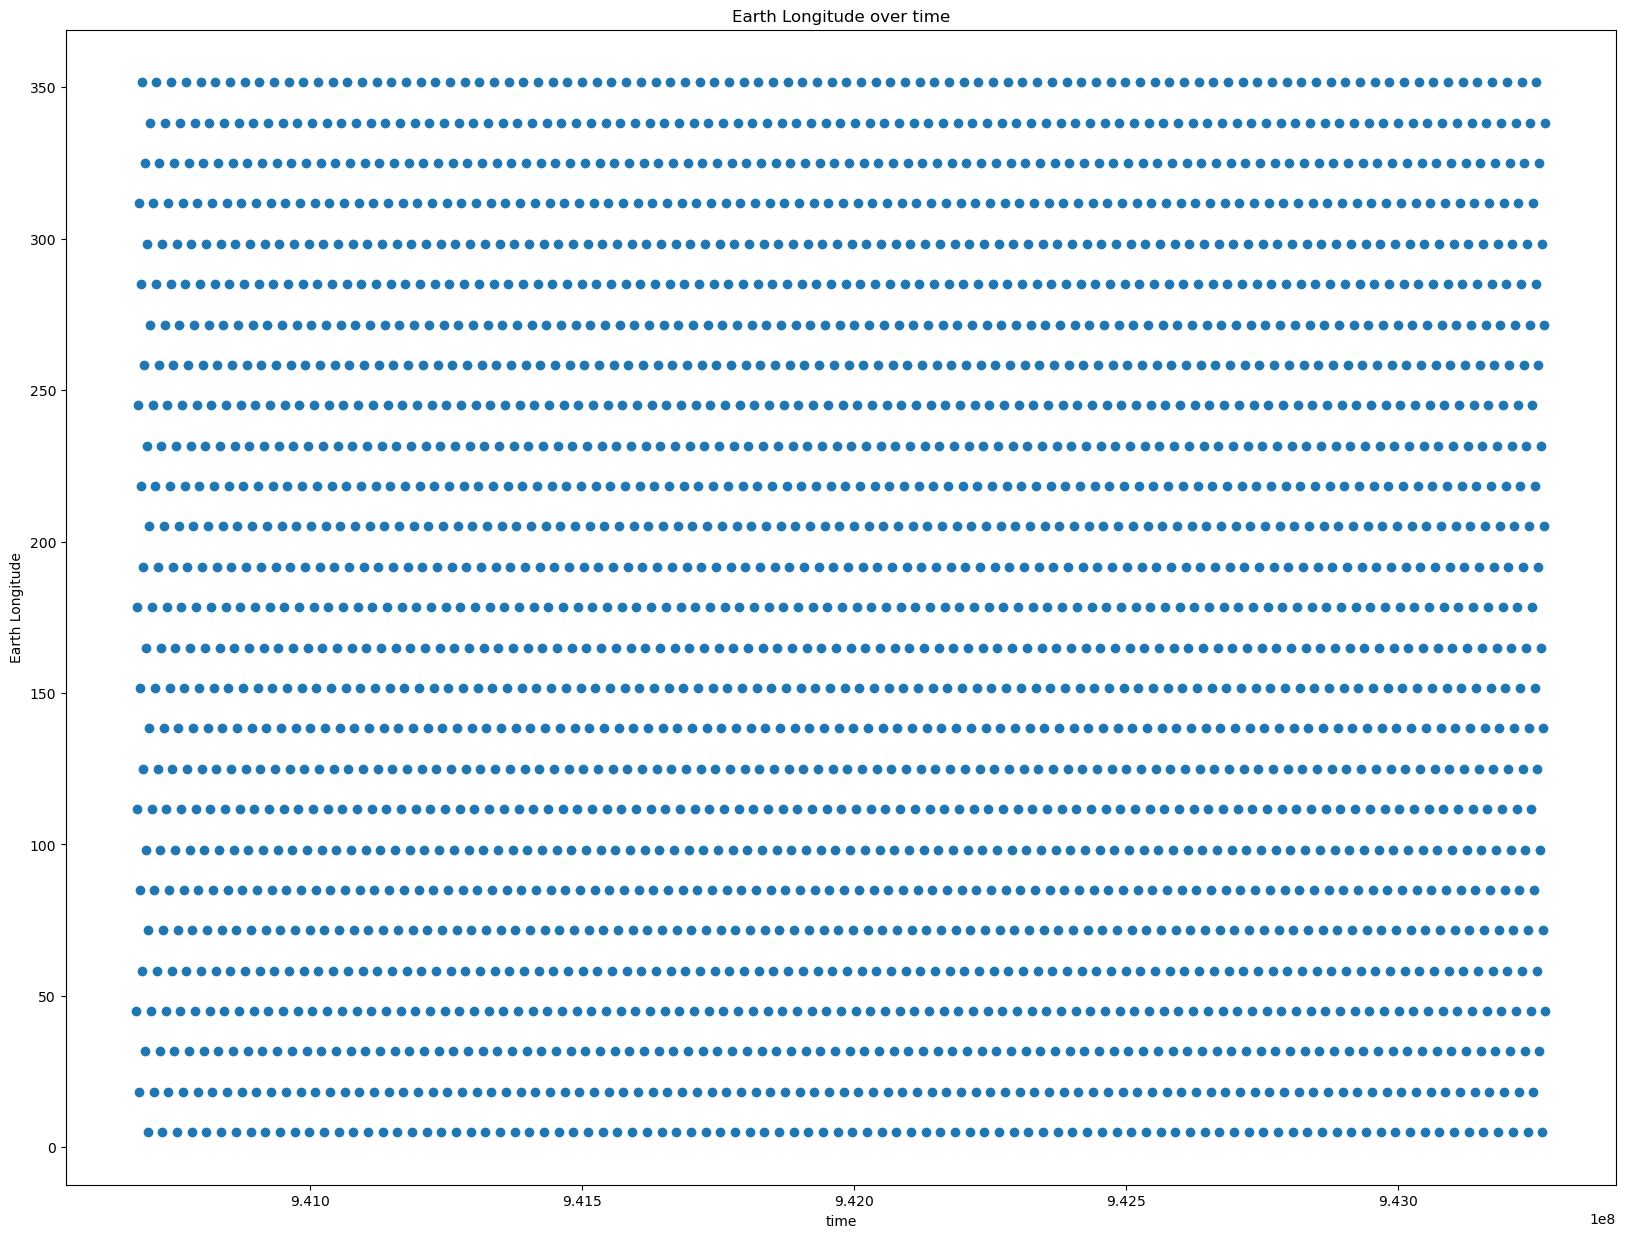

In [9]:
x=time[::10000]
y=earthlongitude[::10000]% (360)
plt.scatter(x, y, marker='o');
plt.xlabel('time')
plt.ylabel('Earth Longitude')
plt.title('Earth Longitude over time')

# 1. Features of data

The piece that seems interesting if plotting the particle count over earth longitude and shift the data by some amount to see the whole picture

Text(0.5, 1.0, 'Particle Count over earth longitude')

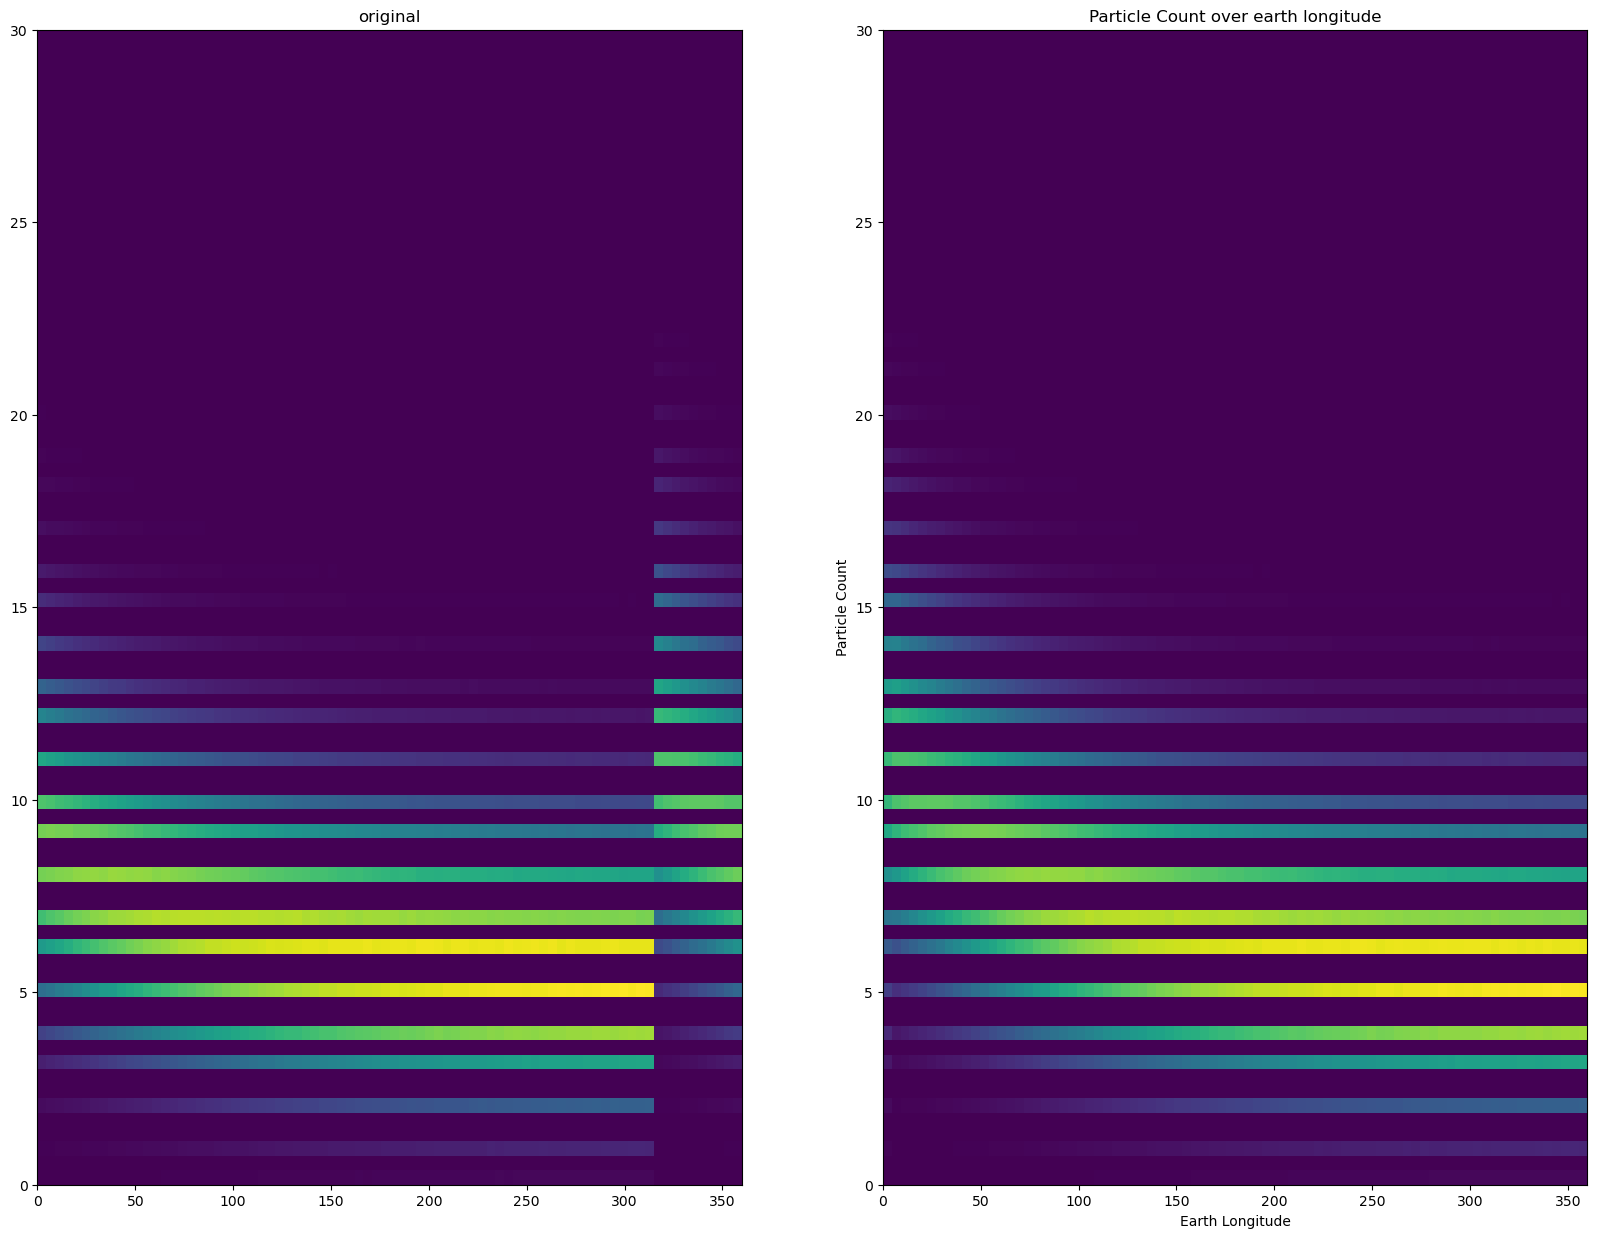

In [65]:
fig, axs = plt.subplots(1, 2)
axs[0].hist2d(earthlongitude, particlecount, bins=80, range=None, density=False)
axs[0].set_title("original")

axs[1].hist2d(np.roll(earthlongitude,-6800), particlecount, bins=80, range=None, density=False)
axs[1].set_title("shifted")

# plt.hist2d(np.roll(earthlongitude,-6800), particlecount, bins=80, range=None, density=False, weights=None, cmin=None, cmax=None)
plt.xlabel('Earth Longitude')
plt.ylabel('Particle Count')
plt.title('Particle Count over earth longitude')

There is certain contamination in the sense that the original particle count vs earth longitude data appears fragmented. The background pdf can be built from taking a verticle slice of the plot above. The particle counts at a specfic earth longitude constitute a meaningful background pdf as the brighter area suggests higher particle counts. Over time, we see the background pdf is evolving. 

# 2. How the background changes

Taking the average of the entire data, the average count is around 6. Taking the shifted amount of the background to make up for the contamination, the average count is around 8, which suggests that the mean is decreasing as the earth longitude increases. 

Text(0, 0.5, 'frequency')

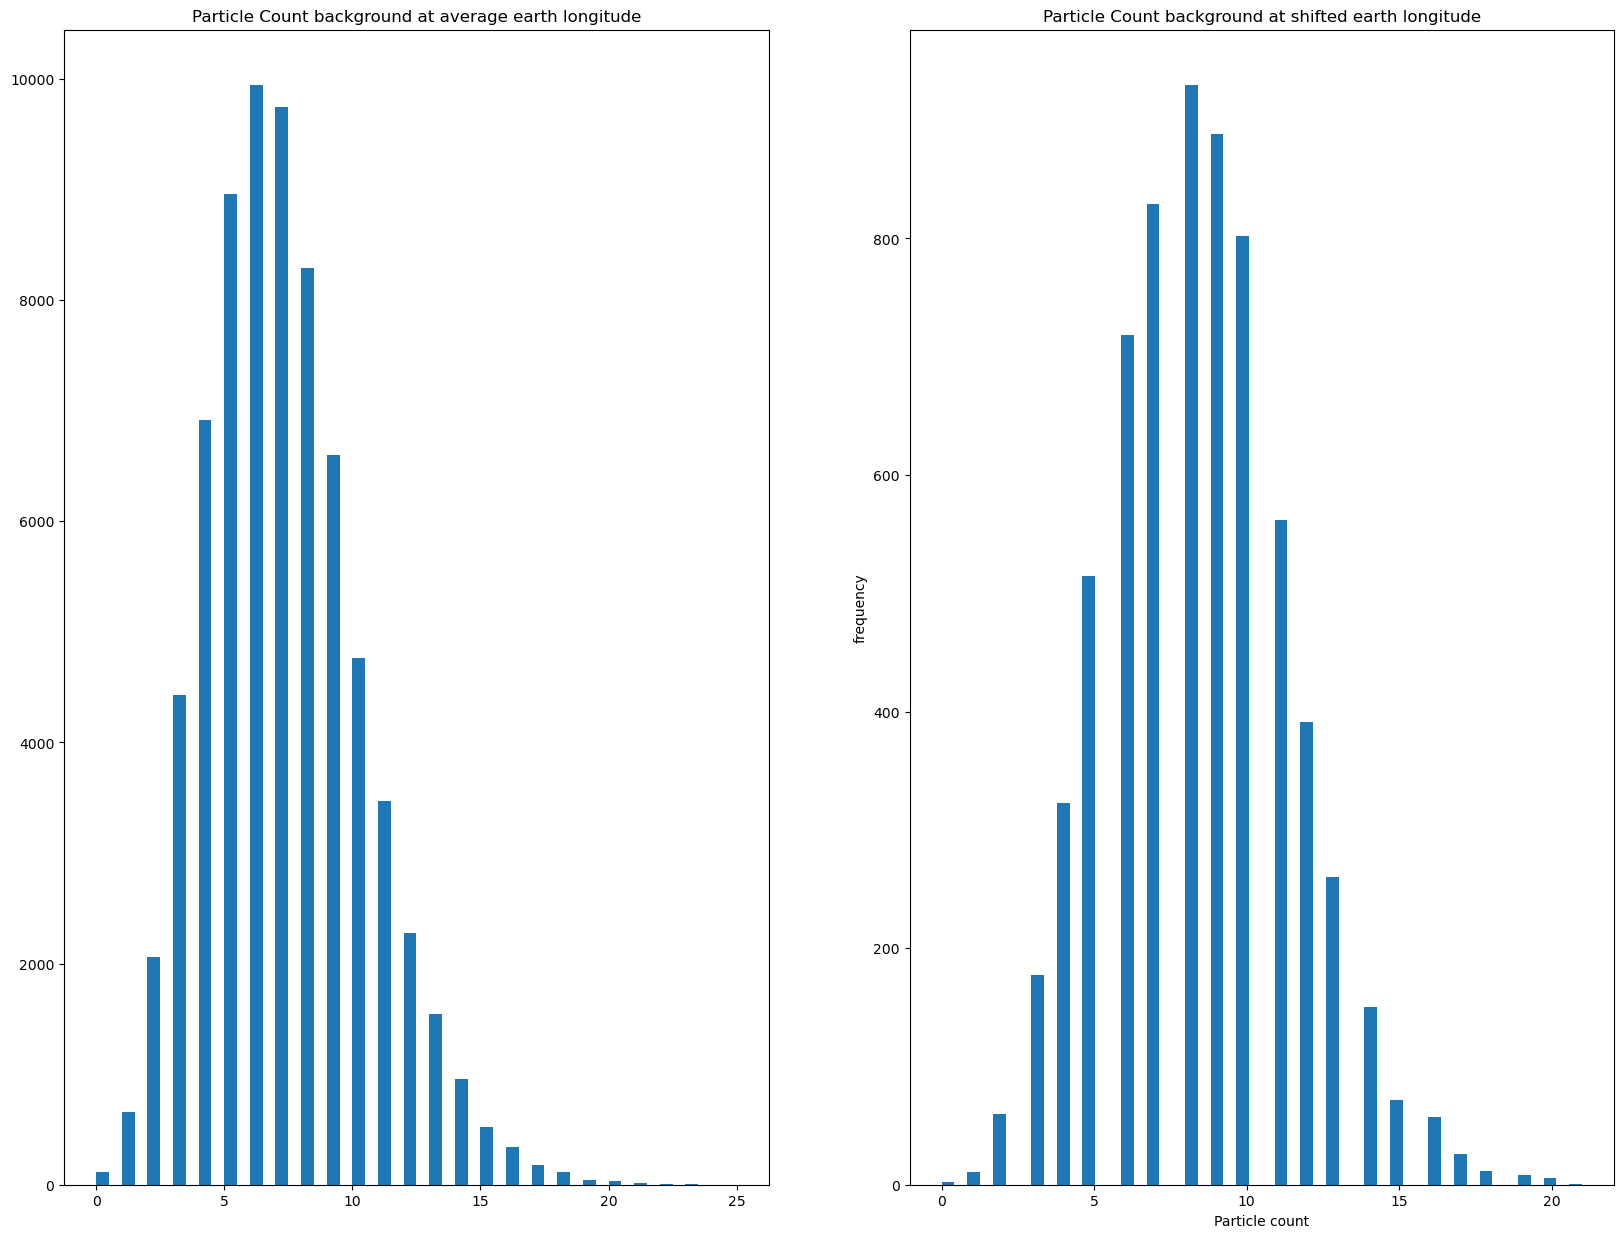

In [68]:
slice0=particlecount[::360]

slice360=particlecount[-6800:]

fig, axs = plt.subplots(1, 2)
axs[0].hist(slice0, 50)
axs[0].set_title('Particle Count background at average earth longitude')

axs[1].hist(slice360, 50)
axs[1].set_title('Particle Count background at shifted earth longitude')

plt.xlabel('Particle count')
plt.ylabel('frequency')

# 3. Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

# 4. Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

# Problem 2

# 1. Download the images

In [4]:
image = h5py.File('image.h5', 'r')

In [5]:
image.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [6]:
image1 = np.array(image.get('image1'))

In [7]:
image1.shape

(200, 200)

In [8]:
stack=image.get('imagestack')

In [9]:
stack.shape

(200, 200, 10)

In [131]:
# the first image

stack[:,:,0]

array([[-0.50492093,  0.31347367,  0.77349547, ..., -0.04589657,
        -0.11759723,  0.73567588],
       [-0.25288444, -0.29488745, -1.22944512, ..., -0.83559631,
        -1.1240839 ,  0.90479232],
       [ 0.82669501, -0.3006203 , -0.03294592, ..., -0.35059418,
        -0.21134798,  0.2446972 ],
       ...,
       [-0.04421337, -0.41529871, -0.53750713, ..., -0.25819324,
        -0.11397904,  0.63726362],
       [ 0.1371078 , -0.16054595,  0.06292987, ..., -0.18569491,
        -0.15209693, -0.51340031],
       [-0.63545846, -0.67648944, -0.81114124, ..., -0.69407377,
         0.27650752, -0.65854951]])

# 2. Explore the data

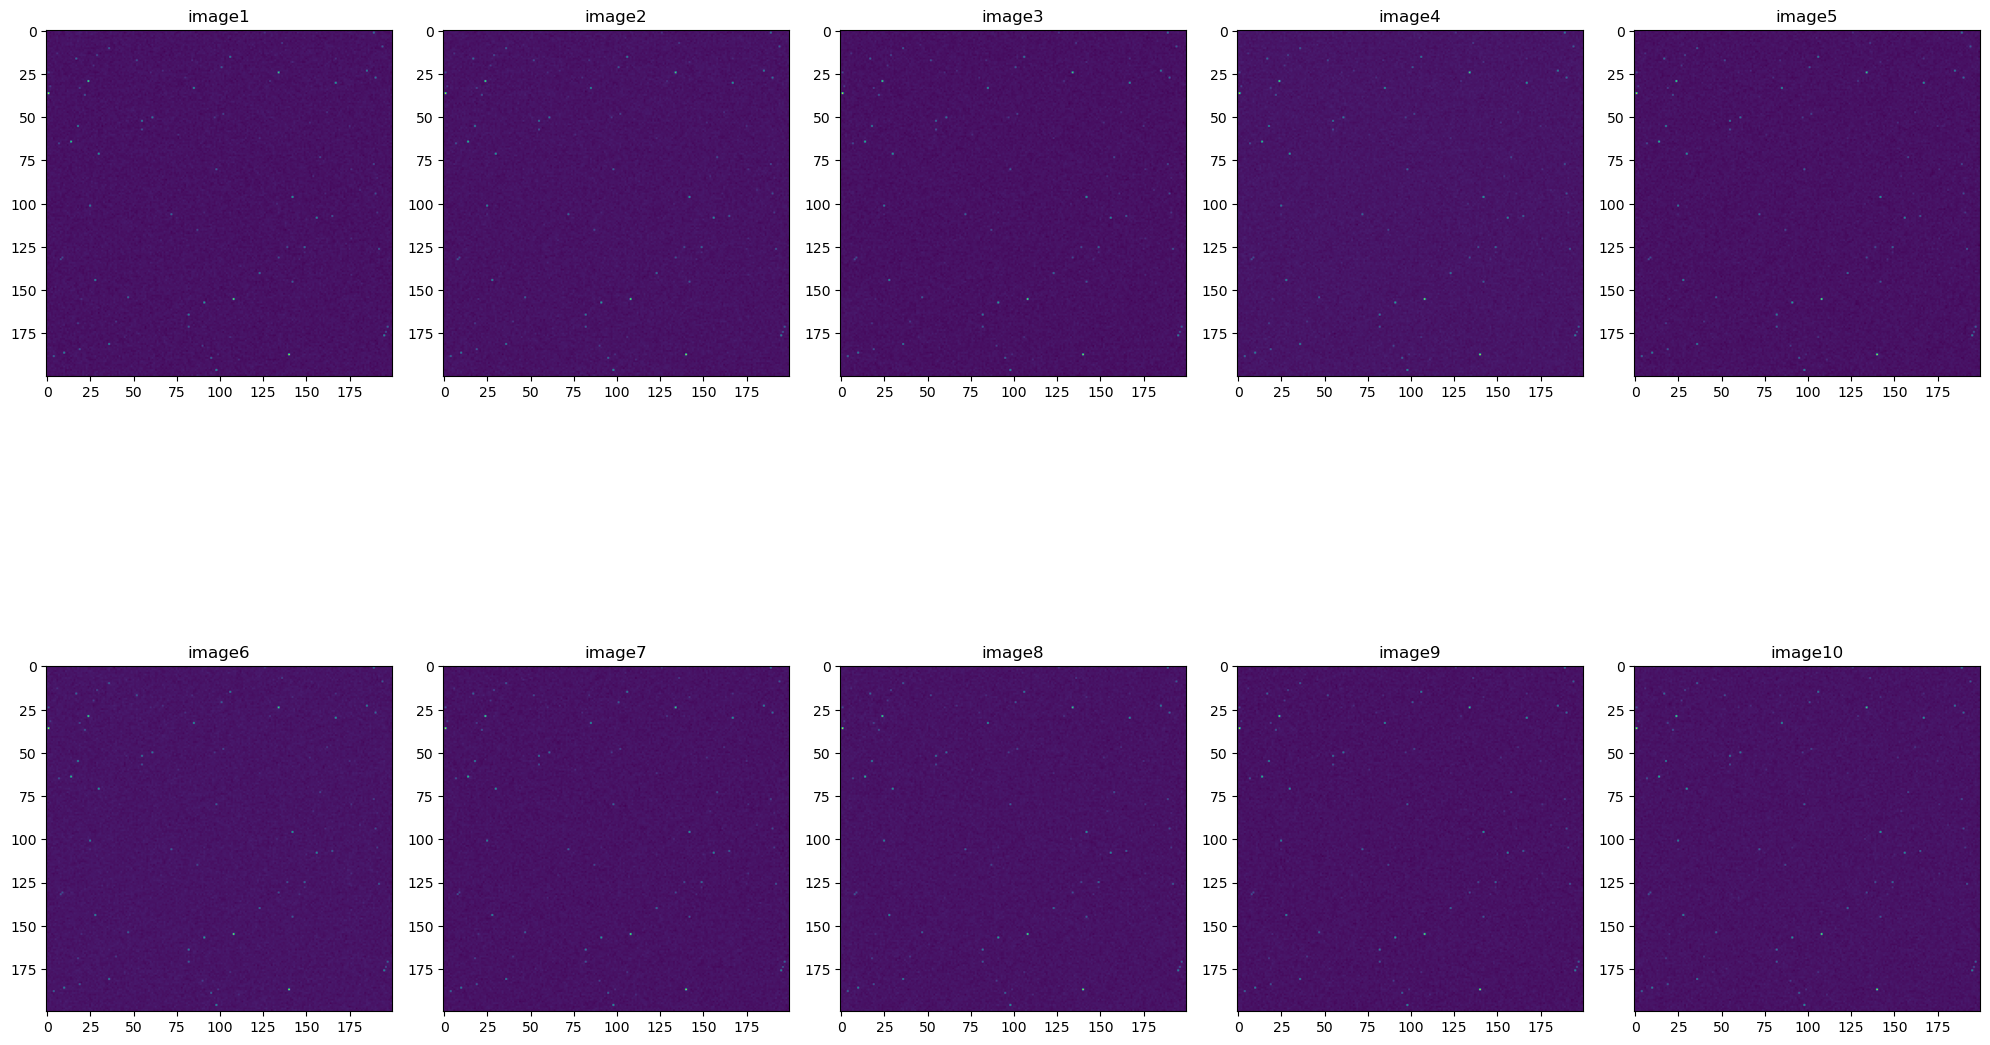

In [37]:
#Plotting each image

fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(stack[:,:,0])
axs[0, 0].set_title("image1")

axs[0, 1].imshow(stack[:,:,1])
axs[0, 1].set_title("image2")

axs[0, 2].imshow(stack[:,:,2])
axs[0, 2].set_title("image3")

axs[0, 3].imshow(stack[:,:,3])
axs[0, 3].set_title("image4")

axs[0, 4].imshow(stack[:,:,4])
axs[0, 4].set_title("image5")

axs[1, 0].imshow(stack[:,:,5])
axs[1, 0].set_title("image6")
axs[1, 0].sharex(axs[0, 0])

axs[1, 1].imshow(stack[:,:,6])
axs[1, 1].set_title("image7")
axs[1, 1].sharex(axs[0, 1])

axs[1, 2].imshow(stack[:,:,7])
axs[1, 2].set_title("image8")
axs[1, 2].sharex(axs[0, 2])

axs[1, 3].imshow(stack[:,:,8])
axs[1, 3].set_title("image9")
axs[1, 3].sharex(axs[0, 3])

axs[1, 4].imshow(stack[:,:,9])
axs[1, 4].set_title("image10")
axs[1, 4].sharex(axs[0, 4])
fig.tight_layout()

The background looks pretty consistent spatially for all images, and showing no time dependence. 

In [22]:
#get the background of each image
flat_image1 = [item for sublist in stack[:,:,0] for item in sublist]
flat_image2 = [item for sublist in stack[:,:,1] for item in sublist]
flat_image3 = [item for sublist in stack[:,:,2] for item in sublist]
flat_image4 = [item for sublist in stack[:,:,3] for item in sublist]
flat_image5 = [item for sublist in stack[:,:,4] for item in sublist]
flat_image6 = [item for sublist in stack[:,:,5] for item in sublist]
flat_image7 = [item for sublist in stack[:,:,6] for item in sublist]
flat_image8 = [item for sublist in stack[:,:,7] for item in sublist]
flat_image9 = [item for sublist in stack[:,:,8] for item in sublist]
flat_image10 = [item for sublist in stack[:,:,9] for item in sublist]

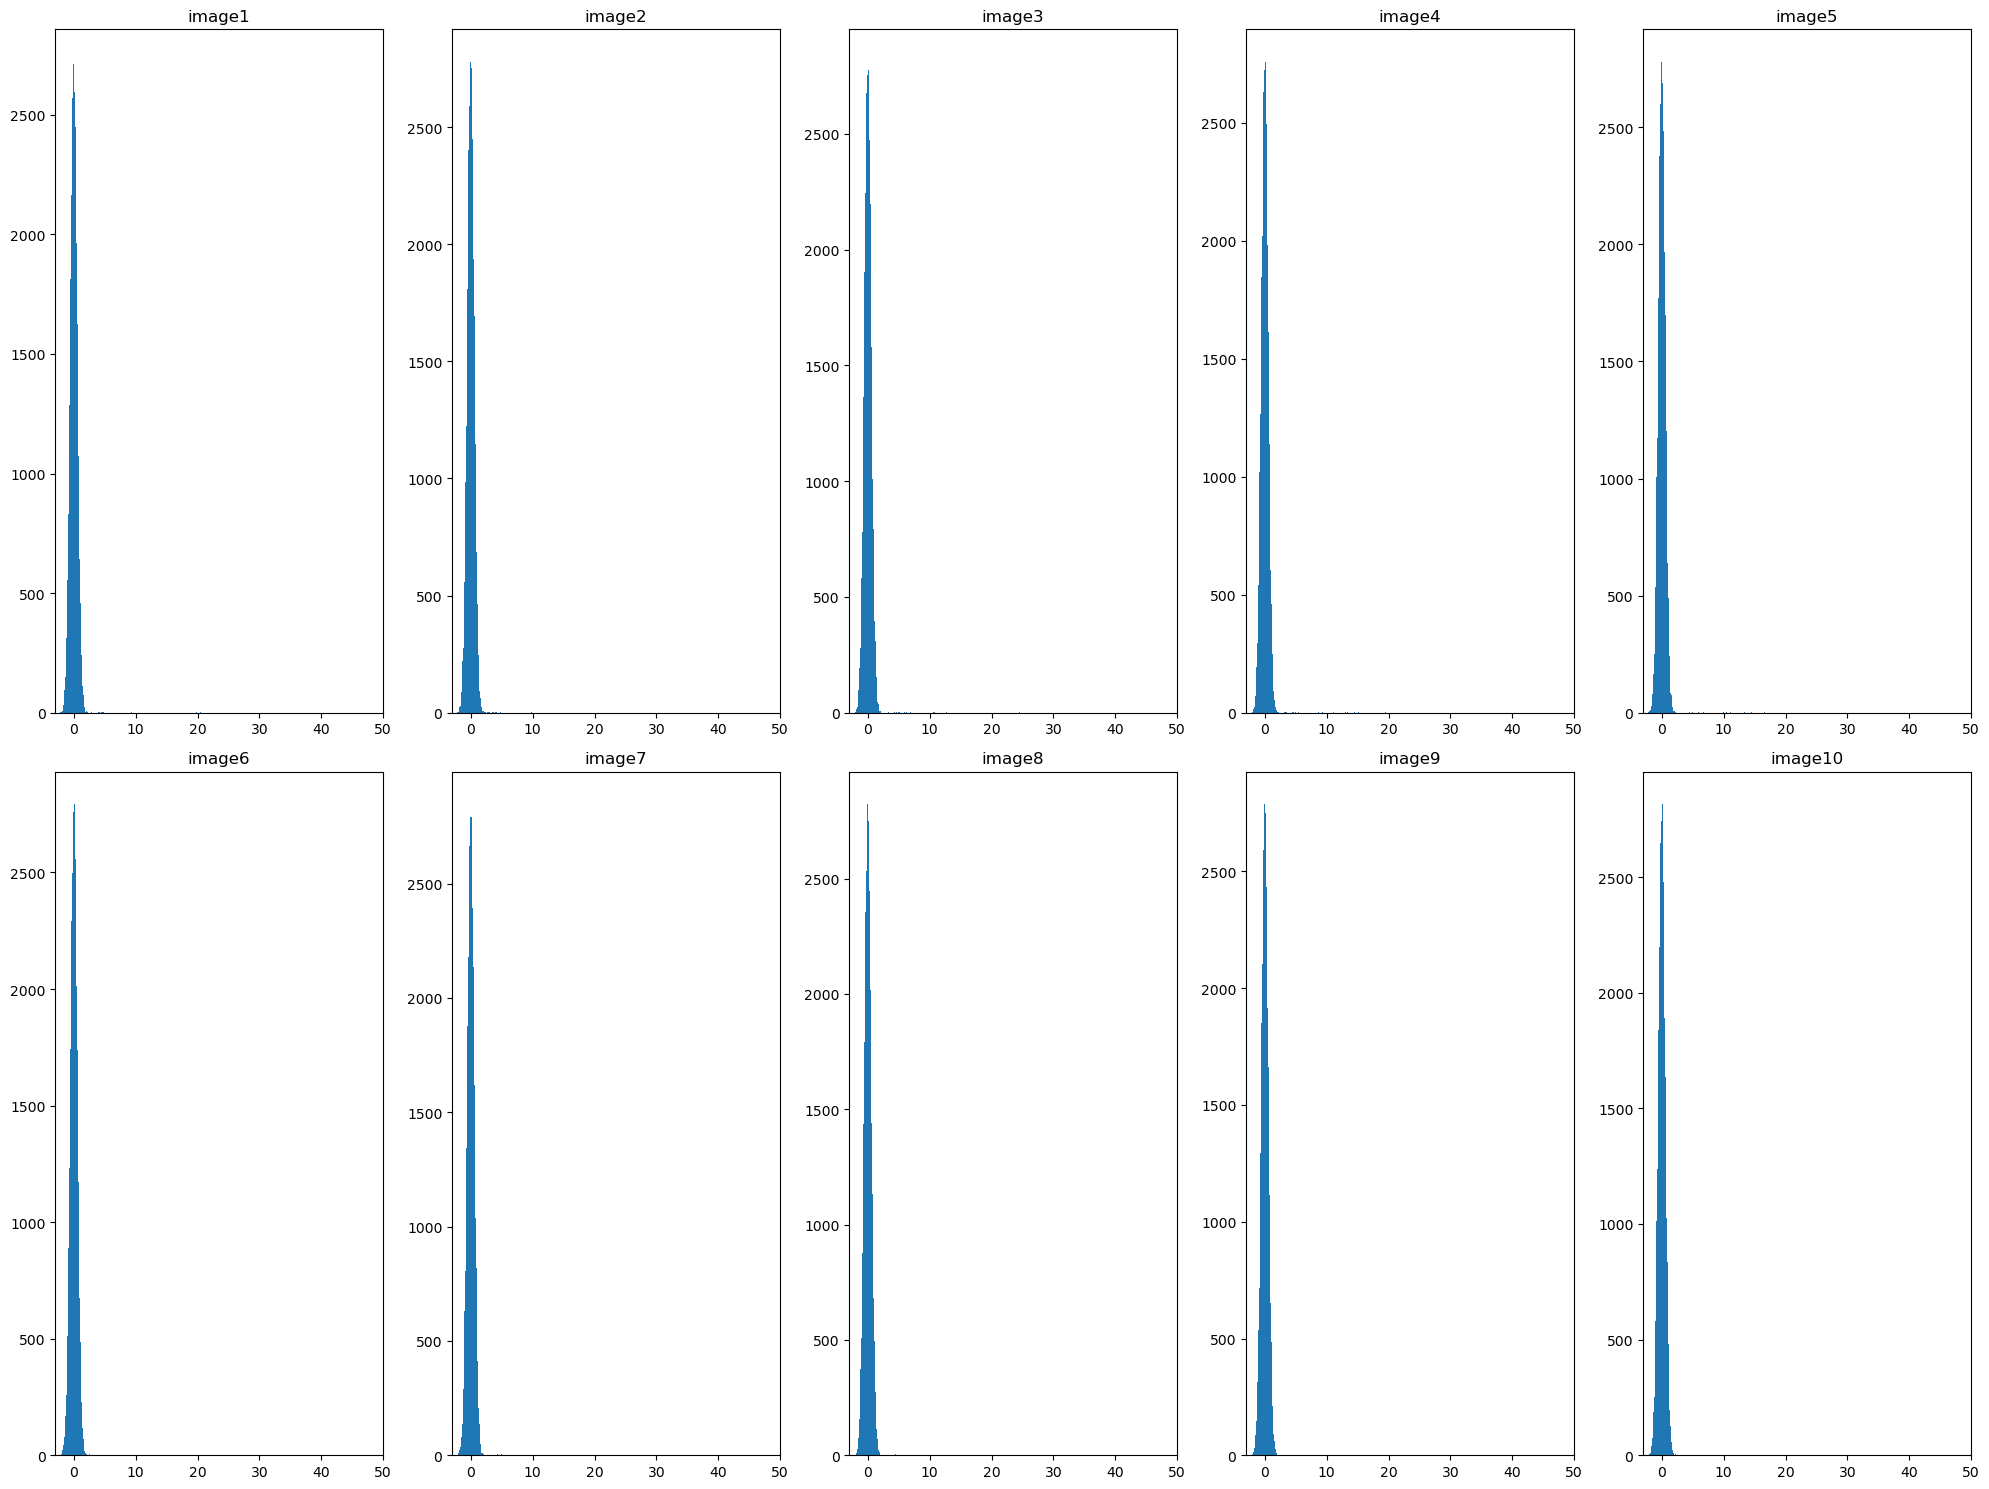

In [61]:
# plt.hist(flat_image1, 500)

fig, axs = plt.subplots(2, 5)
axs[0, 0].hist(flat_image1, 500)
axs[0, 0].set_title("image1")
axs[0, 0].set_xlim([-3, 50])

axs[0, 1].hist(flat_image2, 500)
axs[0, 1].set_xlim([-3, 50])
axs[0, 1].set_title("image2")


axs[0, 2].hist(flat_image3, 500)
axs[0, 2].set_xlim([-3, 50])
axs[0, 2].set_title("image3")

axs[0, 3].hist(flat_image4, 500)
axs[0, 3].set_xlim([-3, 50])
axs[0, 3].set_title("image4")

axs[0, 4].hist(flat_image5, 500)
axs[0, 4].set_xlim([-3, 50])
axs[0, 4].set_title("image5")

axs[1, 0].hist(flat_image6, 500)
axs[1, 0].set_title("image6")
axs[1, 0].sharex(axs[0, 0])

axs[1, 1].hist(flat_image7, 500)
axs[1, 1].set_title("image7")
axs[1, 1].sharex(axs[0, 1])

axs[1, 2].hist(flat_image8, 500)
axs[1, 2].set_title("image8")
axs[1, 2].sharex(axs[0, 2])

axs[1, 3].hist(flat_image9, 500)
axs[1, 3].set_title("image9")
axs[1, 3].sharex(axs[0, 3])

axs[1, 4].hist(flat_image10, 500)
axs[1, 4].set_title("image10")
axs[1, 4].sharex(axs[0, 4])
fig.tight_layout()


The background distribution for each image also appears uniformly Gaussian by eye, so I would't say the data has been contaminated. 

I plan to look for the transient signal, which may only appear in one of the images, so the pdf of the background should be putting the background of all the images together as my pdf to hunt for the signal. Since the everall background is discrete, I'll do a curve fit to find the parameters of the Gaussian shape of the pdf of the transient signal.

# 3. Using your background distribution, hunt for your signal

In [43]:
bg=flat_image1+flat_image2+flat_image3+flat_image4+flat_image5+flat_image6+flat_image7+flat_image8+flat_image9+flat_image10

In [67]:
# from scipy import optimize

# def gaussian(x, amplitude, mean, stddev):
#     return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

import numpy as np
from astropy import modeling

foldbg=np.array(bg)%40000

len(foldbg)

x = np.linspace(-2.709336827866645, 47.79010819628649, 400000)
# popt, _ = optimize.curve_fit(gaussian, x, bg)
# plt.plot(bg)
# plt.plot(x, gaussian(x, *popt))

# fitter = modeling.fitting.LevMarLSQFitter()
# model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
# fitted_model = fitter(model, x, bg)
# plt.plot(foldbg)
# plt.plot(x, fitted_model(x))

# 4. Same data, different pdf when trying to look for transient/constant sigals

In [69]:
len(bg)

400000

In [64]:
len(flat_image8)

40000

In [50]:
max(bg)

47.79010819628649

AttributeError: 'list' object has no attribute 'shape'